In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

In [2]:
allMetricsAndQuestions = pd.read_csv("..\\..\\3-DataMerge\\1-AllFramework\\metricsAndQuestions.csv", index_col=[0,1])

Data normalization

In [3]:
AllMetricsAndQuestionsNormalized=(allMetricsAndQuestions-allMetricsAndQuestions.min())/(allMetricsAndQuestions.max()-allMetricsAndQuestions.min())

In [4]:
time = pd.DataFrame(allMetricsAndQuestions.index.values.tolist(), columns=['year','month'])
time["day"] = 1
time

,year,month,day
0,2013,4,1
1,2013,5,1
2,2013,6,1
3,2013,7,1
4,2013,8,1
...,...,...,...
84,2020,4,1
85,2020,5,1
86,2020,6,1
87,2020,7,1


In [5]:
allMetricsAndQuestions.set_index(pd.to_datetime(time), inplace=True)
AllMetricsAndQuestionsNormalized.set_index(pd.to_datetime(time), inplace=True)

In [6]:
allMetricsAndQuestions["Java"] = allMetricsAndQuestions["numberJavaFiles"]
allMetricsAndQuestions["Readability"] = allMetricsAndQuestions["readability"]
allMetricsAndQuestions["PL"] = allMetricsAndQuestions["CountLine"]
allMetricsAndQuestions["LOC"] = allMetricsAndQuestions["CountLineCode"]
allMetricsAndQuestions["CLOC"] = allMetricsAndQuestions["CountLineComment"]
allMetricsAndQuestions["CBO"] = allMetricsAndQuestions["CountClassCoupled"]
allMetricsAndQuestions["NOC"] = allMetricsAndQuestions["CountClassDerived"]
allMetricsAndQuestions["RFC"] = allMetricsAndQuestions["CountDeclMethodAll"]
allMetricsAndQuestions["DIT"] = allMetricsAndQuestions["MaxInheritanceTree"]
allMetricsAndQuestions["LCOM"] = allMetricsAndQuestions["PercentLackOfCohesion"]
allMetricsAndQuestions["WMC"] = allMetricsAndQuestions["SumCyclomatic"]
allMetricsAndQuestions["Classes"] = allMetricsAndQuestions["CountDeclClass"]
allMetricsAndQuestions["Questions"] = allMetricsAndQuestions["questions"]

AllMetricsAndQuestionsNormalized["Java"] = AllMetricsAndQuestionsNormalized["numberJavaFiles"]
AllMetricsAndQuestionsNormalized["Readability"] = AllMetricsAndQuestionsNormalized["readability"]
AllMetricsAndQuestionsNormalized["PL"] = AllMetricsAndQuestionsNormalized["CountLine"]
AllMetricsAndQuestionsNormalized["LOC"] = AllMetricsAndQuestionsNormalized["CountLineCode"]
AllMetricsAndQuestionsNormalized["CLOC"] = AllMetricsAndQuestionsNormalized["CountLineComment"]
AllMetricsAndQuestionsNormalized["CBO"] = AllMetricsAndQuestionsNormalized["CountClassCoupled"]
AllMetricsAndQuestionsNormalized["NOC"] = AllMetricsAndQuestionsNormalized["CountClassDerived"]
AllMetricsAndQuestionsNormalized["RFC"] = AllMetricsAndQuestionsNormalized["CountDeclMethodAll"]
AllMetricsAndQuestionsNormalized["DIT"] = AllMetricsAndQuestionsNormalized["MaxInheritanceTree"]
AllMetricsAndQuestionsNormalized["LCOM"] = AllMetricsAndQuestionsNormalized["PercentLackOfCohesion"]
AllMetricsAndQuestionsNormalized["WMC"] = AllMetricsAndQuestionsNormalized["SumCyclomatic"]
AllMetricsAndQuestionsNormalized["Classes"] = AllMetricsAndQuestionsNormalized["CountDeclClass"]
AllMetricsAndQuestionsNormalized["Questions"] = AllMetricsAndQuestionsNormalized["questions"]

Plotting only metrics

In [7]:
def plot(data, title, metric, ylabel, xlabel):
    subplot = data.plot(figsize=(15,5), fontsize=20)
    subplot.set_title(title, fontsize=25)
    subplot.set_ylabel(ylabel, fontsize=20)
    subplot.set_xlabel(xlabel, fontsize=20)
    #     subplot.figure.savefig(metric+".pdf",bbox_inches = 'tight')

1 - Source code size

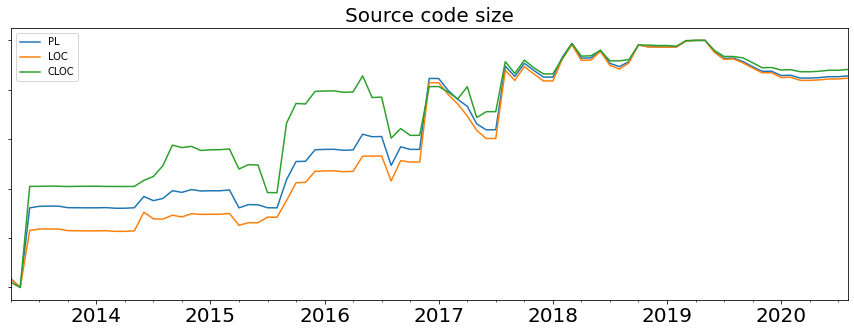

In [8]:
subplot = AllMetricsAndQuestionsNormalized["PL"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["LOC"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["CLOC"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot.set_title("Source code size", fontsize=20)
subplot.set_yticklabels([])
subplot.figure.savefig("sourceCodeSize.pdf",bbox_inches = 'tight')

2 - Source code readability

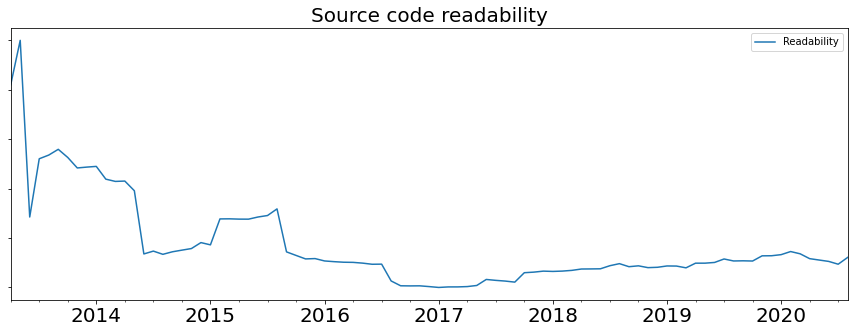

In [9]:
subplot = AllMetricsAndQuestionsNormalized["Readability"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot.set_title("Source code readability", fontsize=20)
subplot.set_yticklabels([])
subplot.figure.savefig("sourceCodeReadability.pdf",bbox_inches = 'tight')

3 - Project size

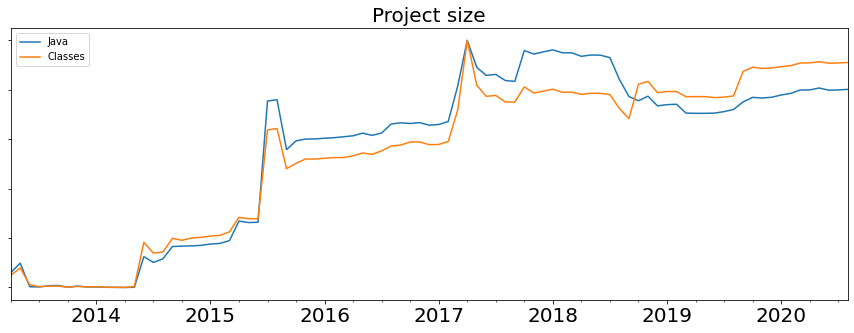

In [10]:
subplot = AllMetricsAndQuestionsNormalized["Java"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["Classes"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot.set_title("Project size", fontsize=20)
subplot.set_yticklabels([])
subplot.figure.savefig("projectSize.pdf",bbox_inches = 'tight')

4 - OO Metrics

[]

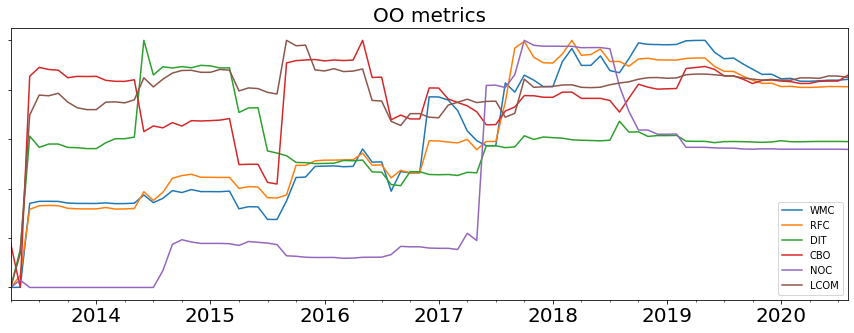

In [11]:
subplot = AllMetricsAndQuestionsNormalized["WMC"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["RFC"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["DIT"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["CBO"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["NOC"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot = AllMetricsAndQuestionsNormalized["LCOM"].plot(figsize=(15,5), fontsize=20, legend=True)
subplot.set_title("OO metrics", fontsize=20)
subplot.set_yticklabels([])

In [12]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':25,
         'xtick.labelsize': 25,
         'ytick.labelsize':25,
          'date.autoformatter.day': '%Y'
         }
plt.rcParams.update(params)

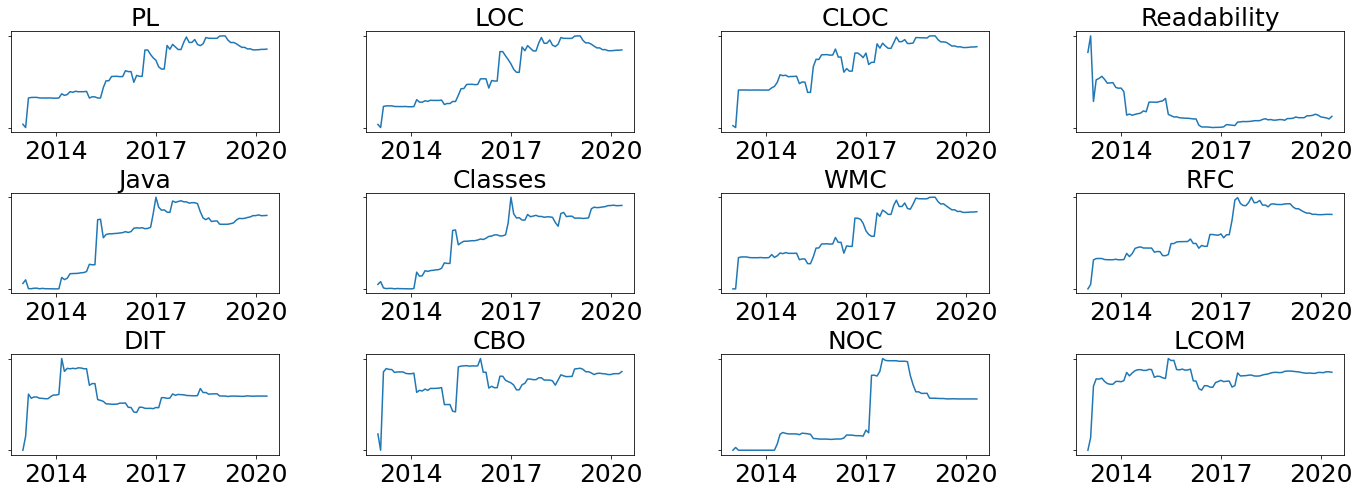

In [13]:
fig, axs = plt.subplots(nrows=3, ncols=4)
# fig.suptitle("Metrics Evolution Over Time", fontsize=25, x=0, y=0.75).set_rotation(90)
fig.tight_layout(pad=2)
axs[0,0].plot(AllMetricsAndQuestionsNormalized["PL"])
axs[0,0].set_yticklabels([])
axs[0,0].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[0,0].set_title("PL")

axs[0,1].plot(AllMetricsAndQuestionsNormalized["LOC"])
axs[0,1].set_yticklabels([])
axs[0,1].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[0,1].set_title("LOC")

axs[0,2].plot(AllMetricsAndQuestionsNormalized["CLOC"])
axs[0,2].set_yticklabels([])
axs[0,2].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[0,2].set_title("CLOC")

axs[0,3].plot(AllMetricsAndQuestionsNormalized["Readability"])
axs[0,3].set_yticklabels([])
axs[0,3].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[0,3].set_title("Readability")

axs[1,0].plot(AllMetricsAndQuestionsNormalized["Java"])
axs[1,0].set_yticklabels([])
axs[1,0].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[1,0].set_title("Java")

axs[1,1].plot(AllMetricsAndQuestionsNormalized["Classes"])
axs[1,1].set_yticklabels([])
axs[1,1].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[1,1].set_title("Classes")

axs[1,2].plot(AllMetricsAndQuestionsNormalized["WMC"])
axs[1,2].set_yticklabels([])
axs[1,2].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[1,2].set_title("WMC")

axs[1,3].plot(AllMetricsAndQuestionsNormalized["RFC"])
axs[1,3].set_yticklabels([])
axs[1,3].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[1,3].set_title("RFC")

axs[2,0].plot(AllMetricsAndQuestionsNormalized["DIT"])
axs[2,0].set_yticklabels([])
axs[2,0].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[2,0].set_title("DIT")

axs[2,1].plot(AllMetricsAndQuestionsNormalized["CBO"])
axs[2,1].set_yticklabels([])
axs[2,1].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[2,1].set_title("CBO")

axs[2,2].plot(AllMetricsAndQuestionsNormalized["NOC"])
axs[2,2].set_yticklabels([])
axs[2,2].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[2,2].set_title("NOC")

axs[2,3].plot(AllMetricsAndQuestionsNormalized["LCOM"])
axs[2,3].set_yticklabels([])
axs[2,3].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[2,3].set_title("LCOM")

fig.savefig("allTrendMetrics.pdf")

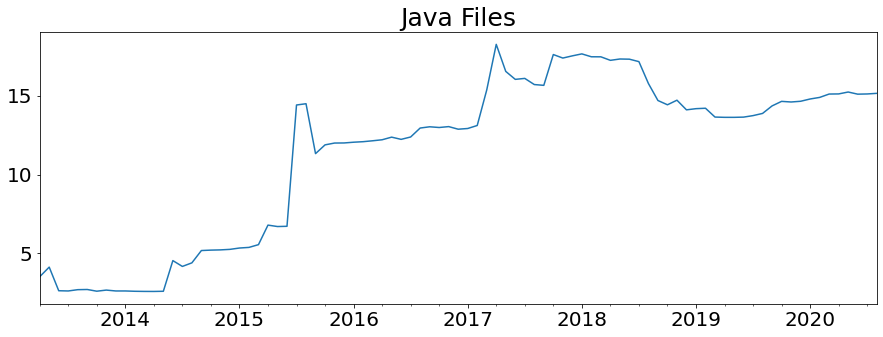

In [14]:
plot(allMetricsAndQuestions["numberJavaFiles"], "Java Files", "Java Files", "", "")

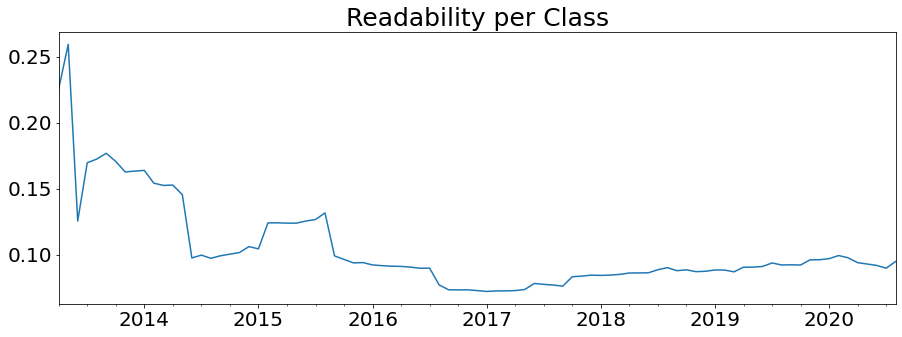

In [15]:
plot(allMetricsAndQuestions["readability"], "Readability per Class", "", "", "")

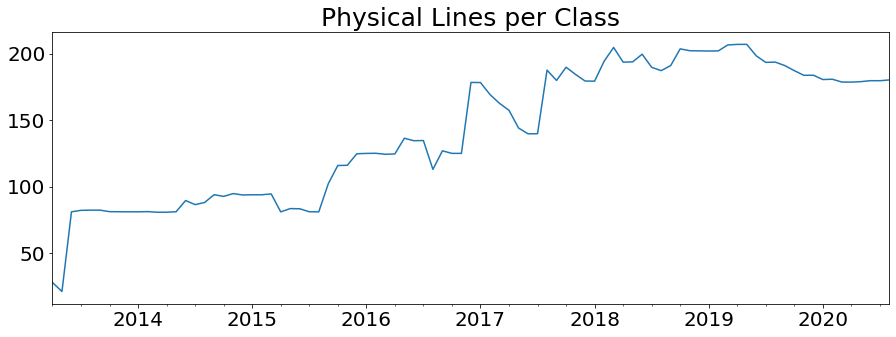

In [16]:
plot(allMetricsAndQuestions["CountLine"], "Physical Lines per Class", "", "", "")

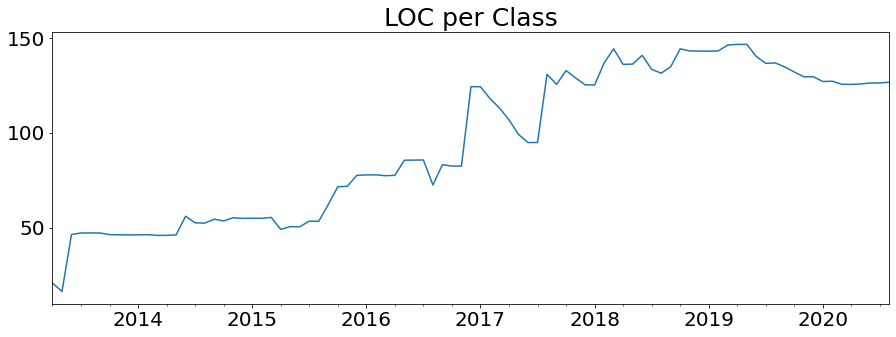

In [17]:
plot(allMetricsAndQuestions["CountLineCode"], "LOC per Class", "LOC per Class", "", "")

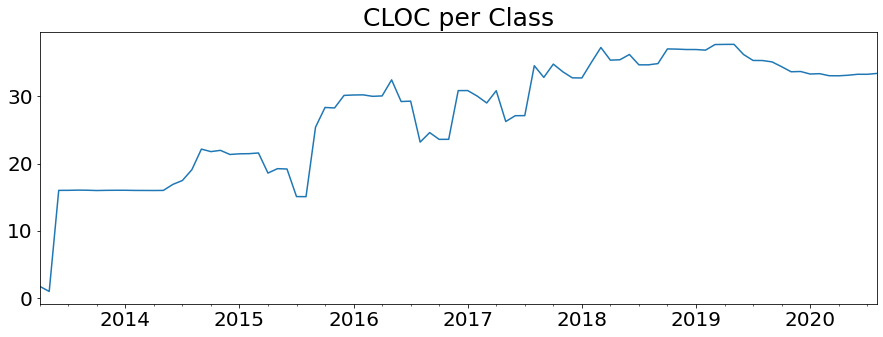

In [18]:
plot(allMetricsAndQuestions["CountLineComment"], "CLOC per Class", "", "", "")

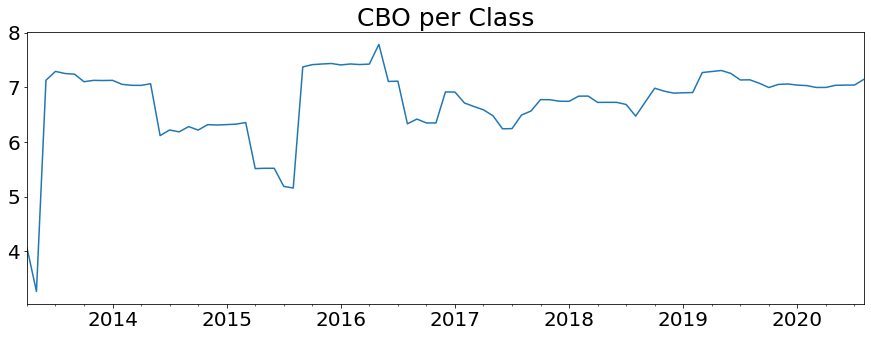

In [19]:
plot(allMetricsAndQuestions["CountClassCoupled"], "CBO per Class", "", "", "")

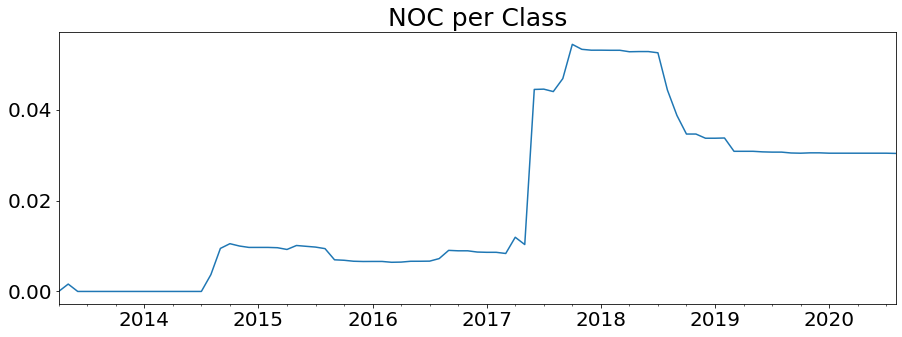

In [20]:
plot(allMetricsAndQuestions["CountClassDerived"], "NOC per Class", "", "", "")

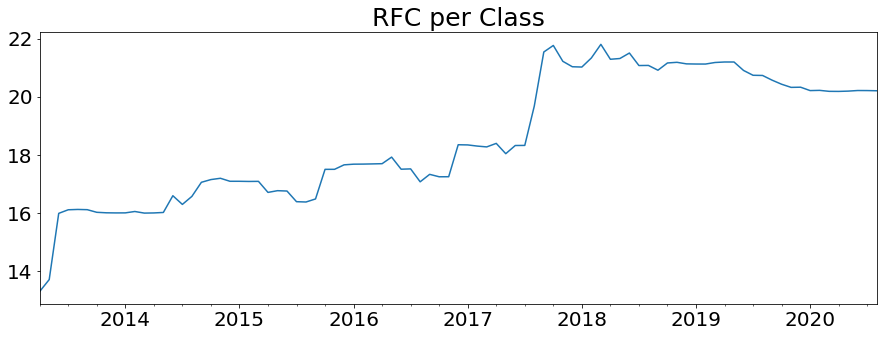

In [21]:
plot(allMetricsAndQuestions["CountDeclMethodAll"], "RFC per Class", "", "", "")

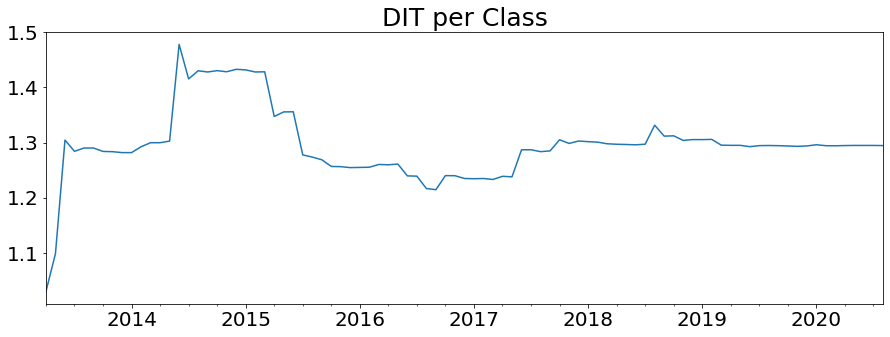

In [22]:
plot(allMetricsAndQuestions["MaxInheritanceTree"], "DIT per Class", "", "", "")

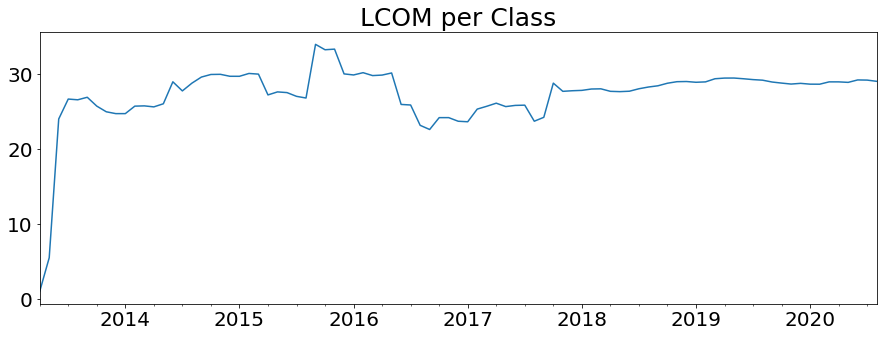

In [23]:
plot(allMetricsAndQuestions["PercentLackOfCohesion"], "LCOM per Class", "", "", "")

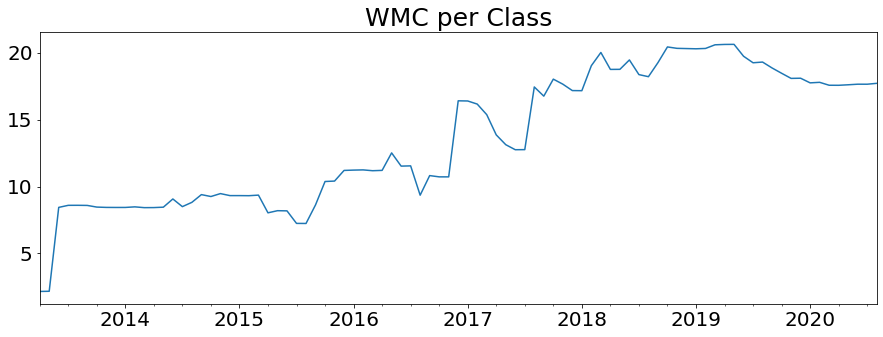

In [24]:
plot(allMetricsAndQuestions["SumCyclomatic"], "WMC per Class", "", "", "")

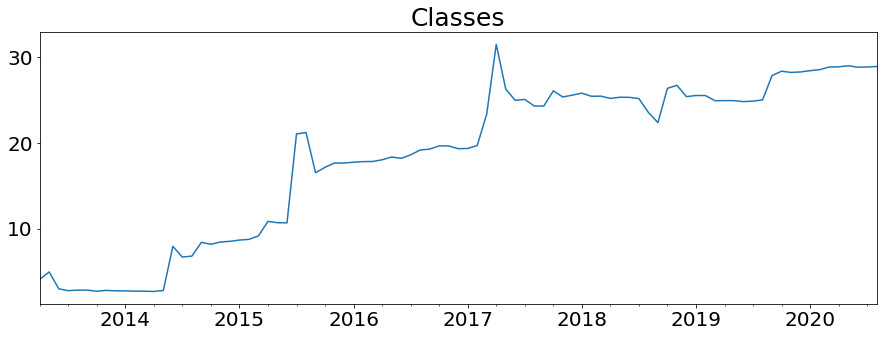

In [25]:
plot(allMetricsAndQuestions["CountDeclClass"], "Classes", "", "", "")

Plotting metrics and questions

In [26]:
def plot(metrics, questions, metric, title, ylabel, xlabel):
    subplot = metrics.plot(figsize=(15,5), fontsize=20, legend=True, label=metric)
    subplot = questions.plot(figsize=(15,5), fontsize=20, legend=True, label="Questions")
    subplot.set_title(title, fontsize=25)
    subplot.set_ylabel(ylabel, fontsize=20)
    subplot.set_xlabel(xlabel, fontsize=20)
    #     subplot.figure.savefig(metric+".pdf",bbox_inches = 'tight')

In [27]:
def plot(dataframe, metric, title, ylabel):
    plot = dataframe.plot(kind="line", y=[metric, "Questions"], subplots=False, figsize=(15,5), fontsize=20, legend=True, secondary_y="Questions")    
    plot.set_title(title, fontsize=25)
    plot.set_ylabel(ylabel, fontsize=20)
    plot.set_xlabel("Year", fontsize=20)
    plot.figure.savefig(metric+".jpg",bbox_inches = 'tight')    

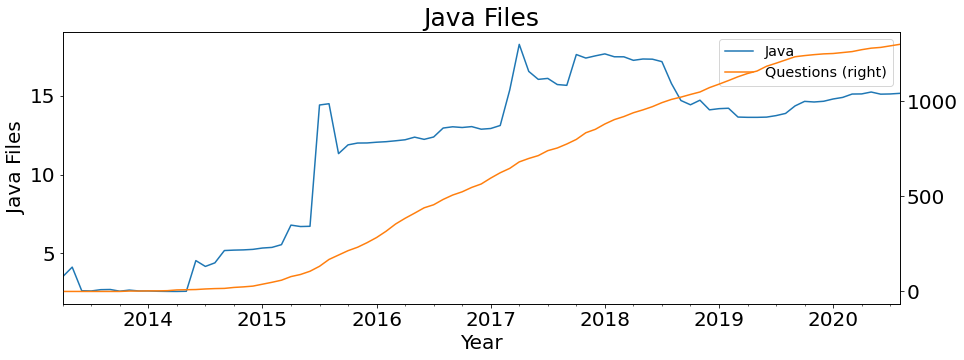

In [28]:
plot(allMetricsAndQuestions, "Java", "Java Files", "Java Files")

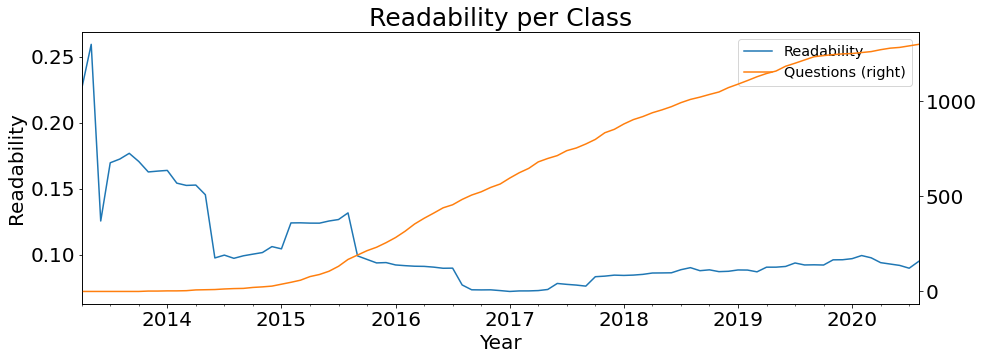

In [29]:
plot(allMetricsAndQuestions, "Readability", "Readability per Class", "Readability")

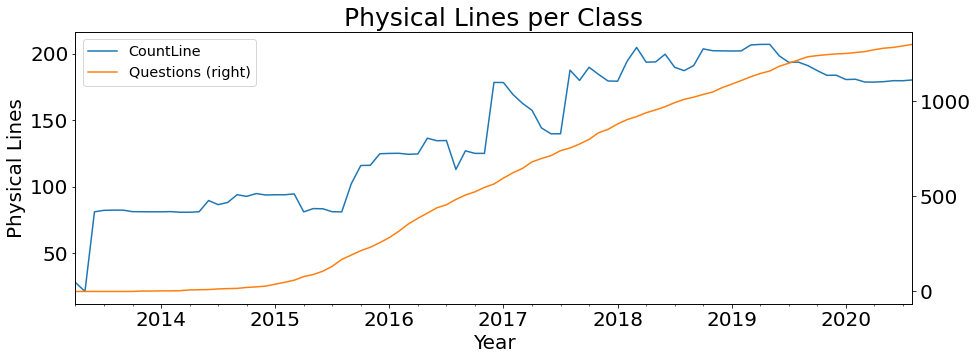

In [30]:
plot(allMetricsAndQuestions, "CountLine", "Physical Lines per Class", "Physical Lines")

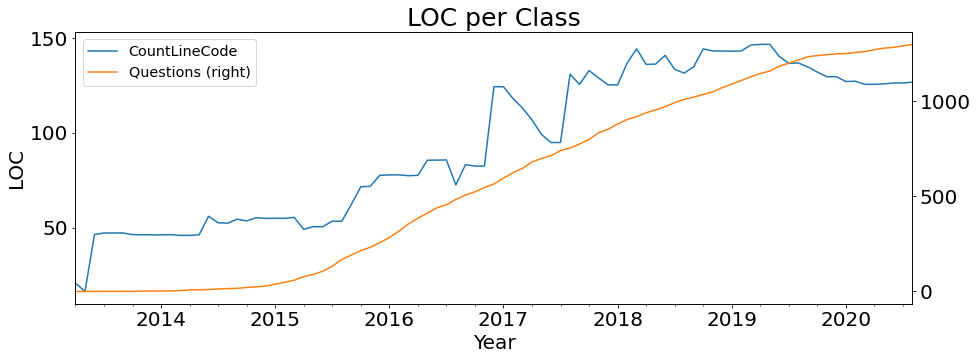

In [31]:
plot(allMetricsAndQuestions, "CountLineCode", "LOC per Class", "LOC")

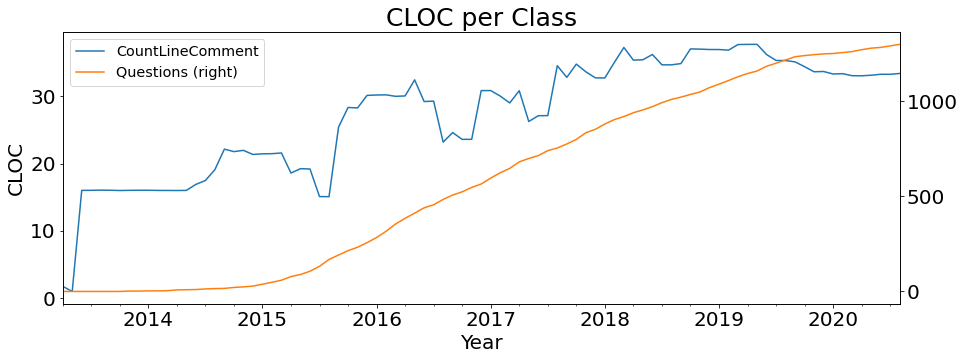

In [32]:
plot(allMetricsAndQuestions, "CountLineComment", "CLOC per Class", "CLOC")

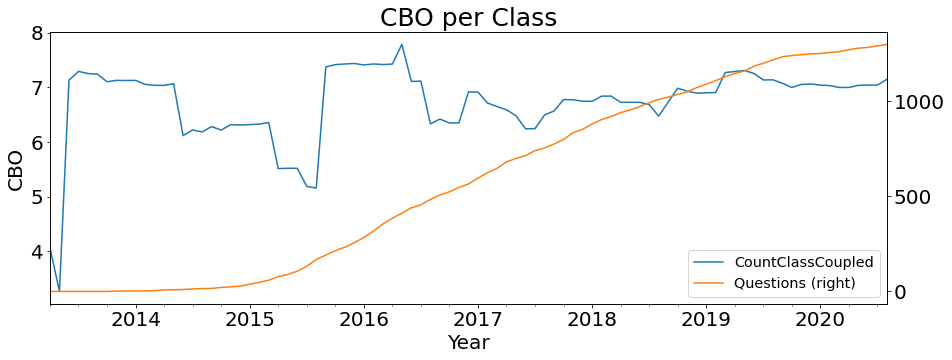

In [33]:
plot(allMetricsAndQuestions, "CountClassCoupled", "CBO per Class", "CBO")

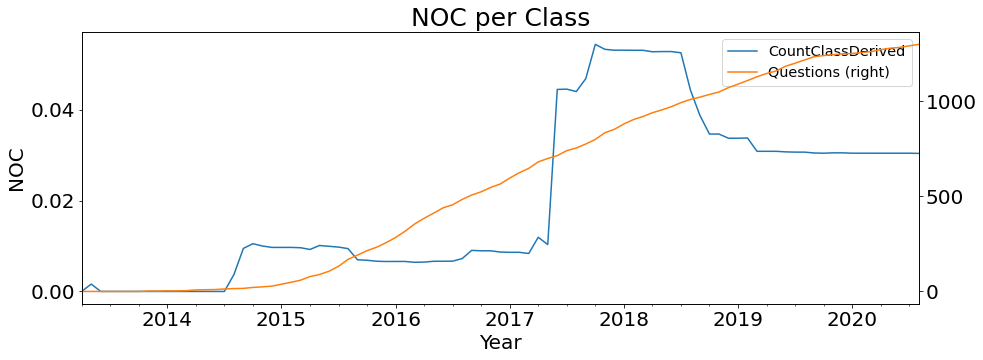

In [34]:
plot(allMetricsAndQuestions, "CountClassDerived", "NOC per Class", "NOC")

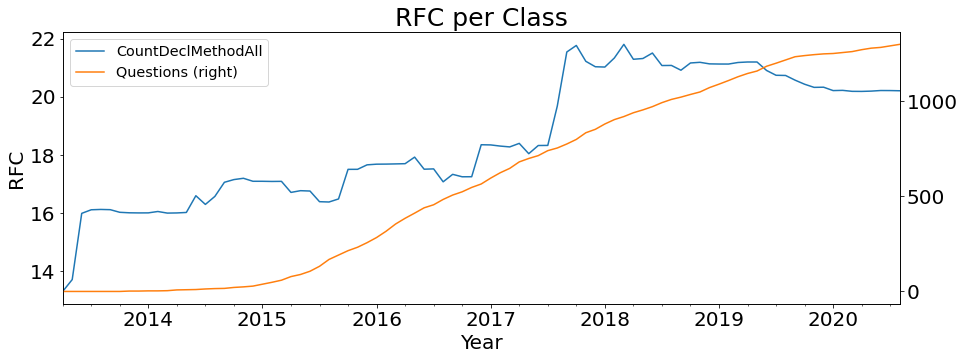

In [35]:
plot(allMetricsAndQuestions, "CountDeclMethodAll", "RFC per Class", "RFC")

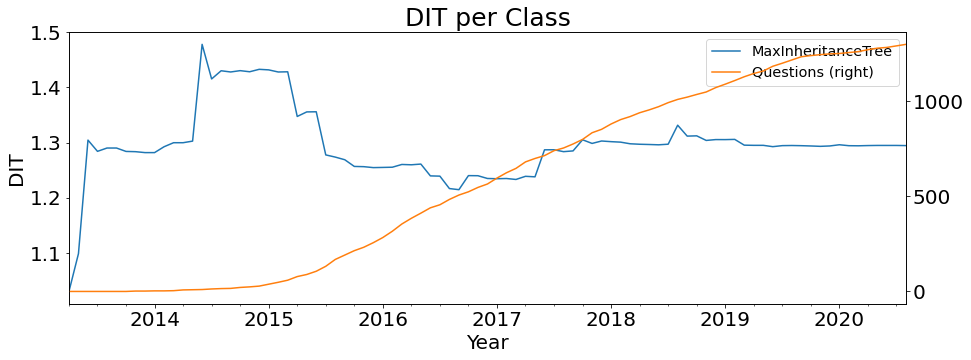

In [36]:
plot(allMetricsAndQuestions, "MaxInheritanceTree", "DIT per Class", "DIT")

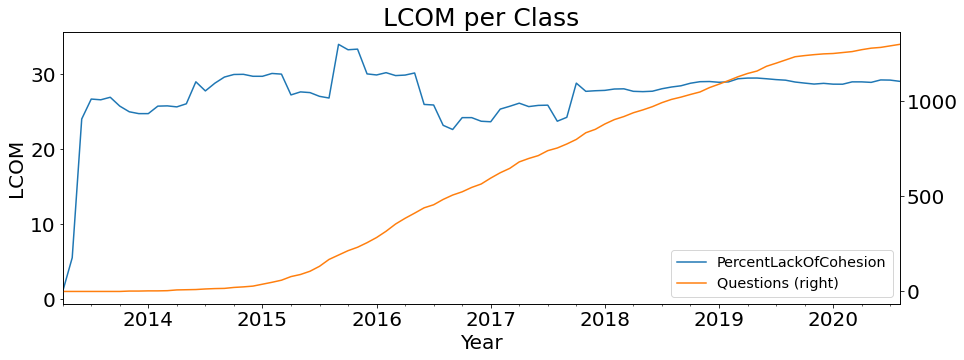

In [37]:
plot(allMetricsAndQuestions, "PercentLackOfCohesion", "LCOM per Class", "LCOM")

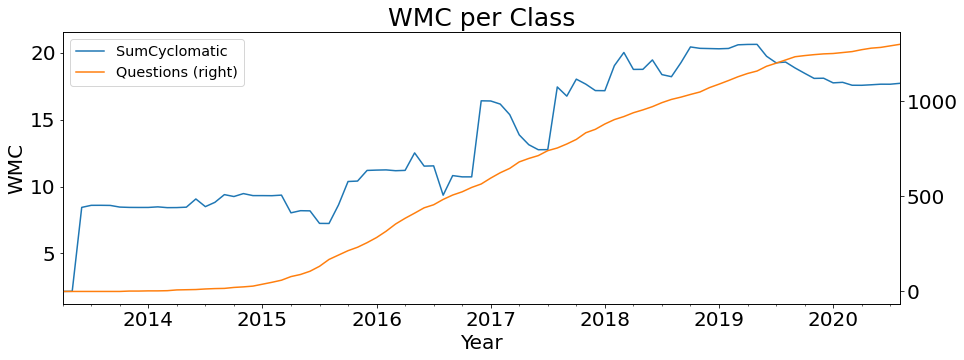

In [38]:
plot(allMetricsAndQuestions, "SumCyclomatic", "WMC per Class", "WMC")

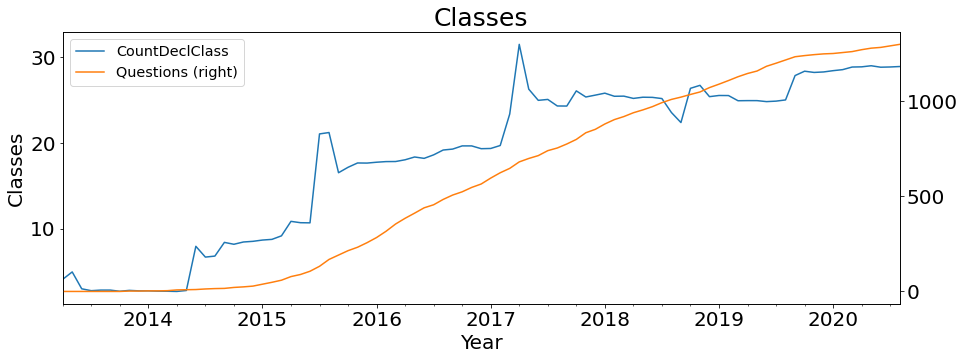

In [39]:
plot(allMetricsAndQuestions, "CountDeclClass", "Classes", "Classes")

In [40]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 7),
         'axes.labelsize': 'x-large',
         'axes.titlesize':25,
         'xtick.labelsize': 25,
         'ytick.labelsize':25,
          'date.autoformatter.day': '%Y',
          'legend.fontsize': 20,
         }
plt.rcParams.update(params)

1 - Source code size

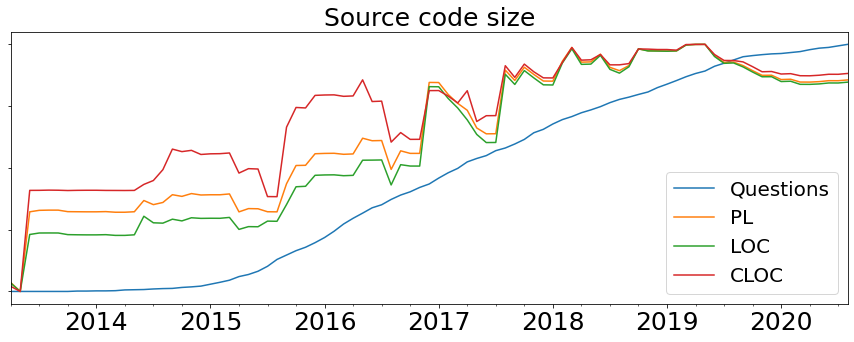

In [41]:
subplot = AllMetricsAndQuestionsNormalized["Questions"].plot(figsize=(15,5), legend=True)
subplot = AllMetricsAndQuestionsNormalized["PL"].plot(figsize=(15,5), legend=True)
subplot = AllMetricsAndQuestionsNormalized["LOC"].plot(figsize=(15,5), legend=True)
subplot = AllMetricsAndQuestionsNormalized["CLOC"].plot(figsize=(15,5), legend=True)
subplot.set_title("Source code size")
subplot.set_yticklabels([])
subplot.figure.savefig("sourceCodeSize.pdf",bbox_inches = 'tight')

2 - Source code readability

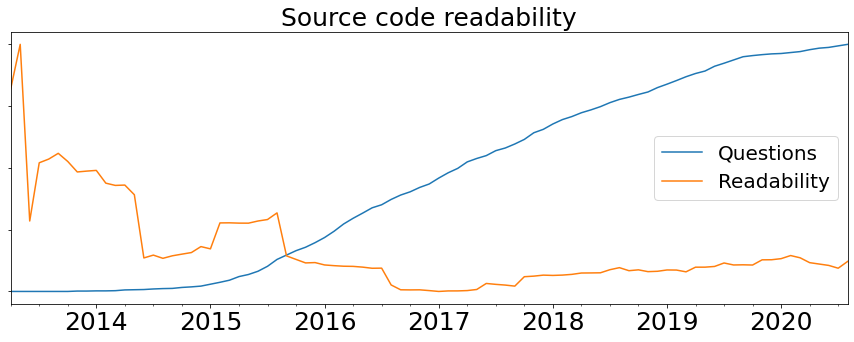

In [42]:
subplot = AllMetricsAndQuestionsNormalized["Questions"].plot(figsize=(15,5), legend=True)
subplot = AllMetricsAndQuestionsNormalized["Readability"].plot(figsize=(15,5), legend=True)
subplot.set_title("Source code readability")
subplot.set_yticklabels([])
subplot.figure.savefig("sourceCodeReadability.pdf",bbox_inches = 'tight')

3 - Project size

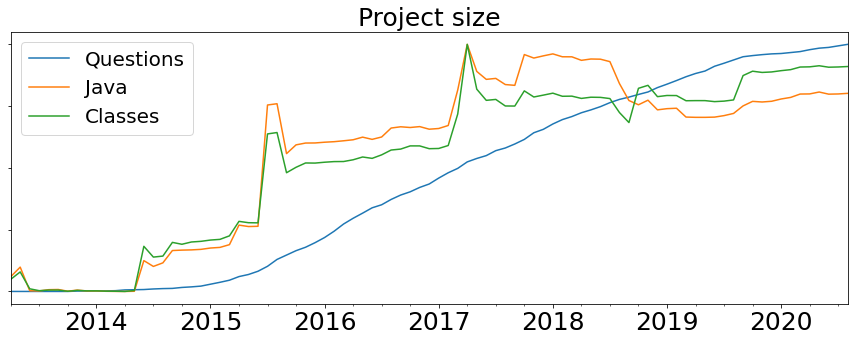

In [43]:
subplot = AllMetricsAndQuestionsNormalized["Questions"].plot(figsize=(15,5), legend=True)
subplot = AllMetricsAndQuestionsNormalized["Java"].plot(figsize=(15,5), legend=True)
subplot = AllMetricsAndQuestionsNormalized["Classes"].plot(figsize=(15,5), legend=True)
subplot.set_title("Source code readability")
subplot.set_title("Project size")
subplot.set_yticklabels([])
subplot.figure.savefig("projectSize.pdf",bbox_inches = 'tight')

4 - OO Metrics

In [44]:
params = {
          'figure.figsize': (12,8),
         'axes.labelsize': 'x-large',
         'axes.titlesize': 26,
         'xtick.labelsize': 26,
         'ytick.labelsize':26,
          'date.autoformatter.day': '%Y',
          'legend.fontsize': 20
         }
plt.rcParams.update(params)

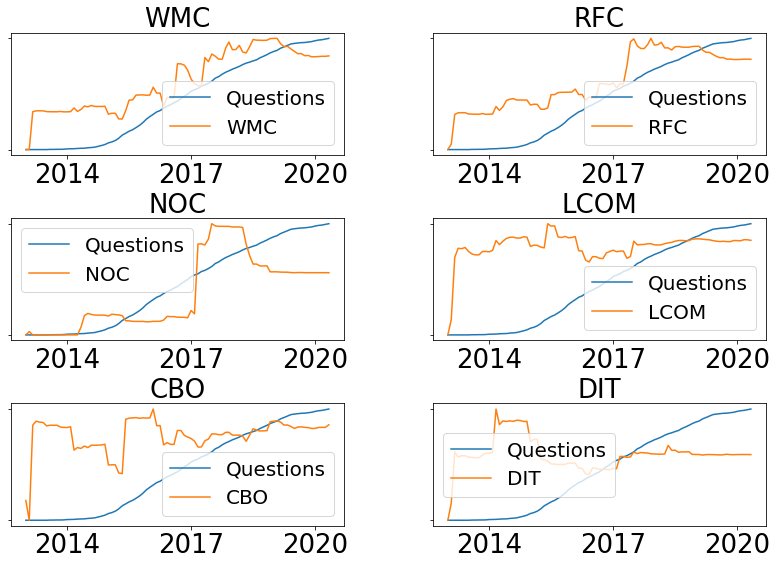

In [45]:
fig, axs = plt.subplots(nrows=3, ncols=2)
# fig.suptitle("Metrics Evolution Over Time", fontsize=25, x=0, y=0.75).set_rotation(90)
fig.tight_layout(pad=2)
axs[0,0].plot(AllMetricsAndQuestionsNormalized["Questions"])
axs[0,0].plot(AllMetricsAndQuestionsNormalized["WMC"])
axs[0,0].legend(["Questions", "WMC"])
axs[0,0].set_yticklabels([])
axs[0,0].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[0,0].set_title("WMC")

axs[0,1].plot(AllMetricsAndQuestionsNormalized["Questions"])
axs[0,1].plot(AllMetricsAndQuestionsNormalized["RFC"])
axs[0,1].legend(["Questions", "RFC"])
axs[0,1].set_yticklabels([])
axs[0,1].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[0,1].set_title("RFC")

axs[1,0].plot(AllMetricsAndQuestionsNormalized["Questions"])
axs[1,0].plot(AllMetricsAndQuestionsNormalized["NOC"])
axs[1,0].legend(["Questions", "NOC"])
axs[1,0].set_yticklabels([])
axs[1,0].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[1,0].set_title("NOC")

axs[1,1].plot(AllMetricsAndQuestionsNormalized["Questions"])
axs[1,1].plot(AllMetricsAndQuestionsNormalized["LCOM"])
axs[1,1].legend(["Questions", "LCOM"])
axs[1,1].set_yticklabels([])
axs[1,1].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[1,1].set_title("LCOM")

axs[2,0].plot(AllMetricsAndQuestionsNormalized["Questions"])
axs[2,0].plot(AllMetricsAndQuestionsNormalized["CBO"])
axs[2,0].legend(["Questions", "CBO"])
axs[2,0].set_yticklabels([])
axs[2,0].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[2,0].set_title("CBO")

axs[2,1].plot(AllMetricsAndQuestionsNormalized["Questions"])
axs[2,1].plot(AllMetricsAndQuestionsNormalized["DIT"])
axs[2,1].legend(["Questions", "DIT"])
axs[2,1].set_yticklabels([])
axs[2,1].set_xticks([AllMetricsAndQuestionsNormalized.index[12], AllMetricsAndQuestionsNormalized.index[36+12] , AllMetricsAndQuestionsNormalized.index[36+36+12]])
axs[2,1].set_title("DIT")

fig.savefig("ooMetricks.pdf")